![zad9](img/zad9.png)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import pandas as pd

In [3]:
dx1 = lambda x, y: (y**2*np.log(x) - y) / x
y_true = lambda x: 1/(np.log(x) + 1)
a = 1
b = 2
h = 0.05
y_1 = 1

I_true = scipy.integrate.quad(y_true, a, b)[0]
I_true

0.7371607096236801

# Метод Эйлера-Коши

In [4]:
euler_x = [a]
euler_y = [1]

while euler_x[-1] < b:
    euler_y.append(euler_y[-1] + h*dx1(euler_x[-1], euler_y[-1]))
    euler_x.append(euler_x[-1] + h)

pd.DataFrame(euler_y, index=euler_x, columns=["y"])

,y
1.00,1.000000
1.05,0.950000
1.10,0.906859
1.15,0.869201
1.20,0.836000
1.25,0.806476
1.30,0.780023
1.35,0.756161
1.40,0.734511
1.45,0.714761


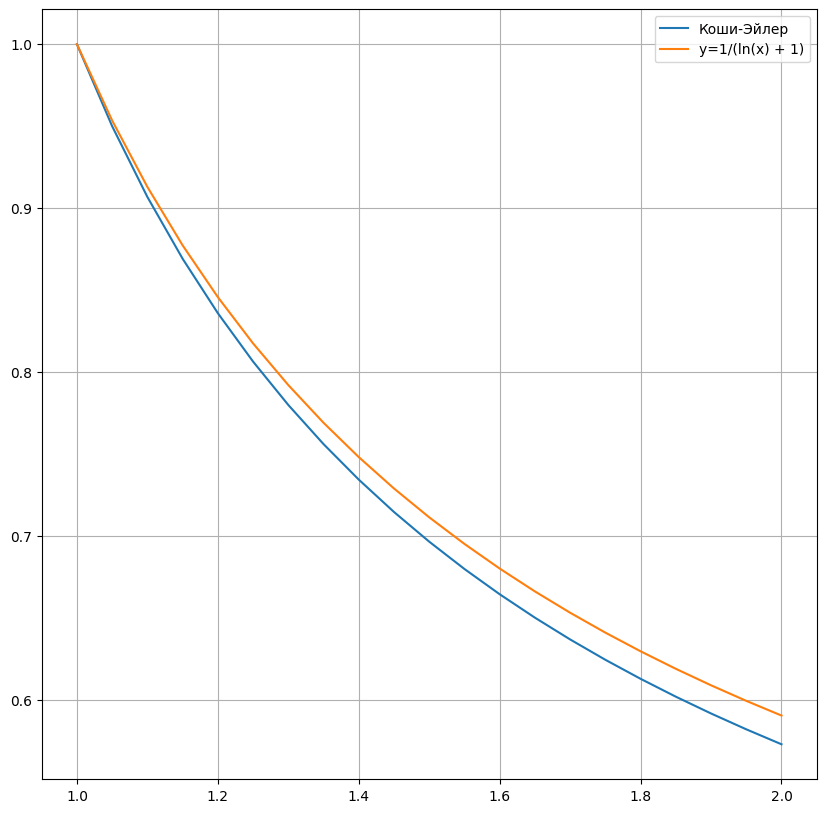

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(euler_x, euler_y, label="Коши-Эйлер")

x_true_range = np.linspace(a, b, len(euler_x))
y_true_range = y_true(x_true_range)
ax.plot(x_true_range, y_true_range, label=f'y=1/(ln(x) + 1)')

ax.grid()
ax.legend()

### Наибольшая погрешность в конце отрезка

In [7]:
error = abs(euler_y[-1] - y_true_range[-1])
error

np.float64(0.017518877575046332)

# Метод Рунге-Кутта

In [8]:
runge_x = [1]
runge_y = [1]

while runge_x[-1] < b:
    k1 = dx1(runge_x[-1], runge_y[-1])
    k2 = dx1(runge_x[-1] + (h/2), runge_y[-1] + h*k1/2)
    k3 = dx1(runge_x[-1] + h / 2, runge_y[-1] + h*k2/2)
    k4 = dx1(runge_x[-1] + h, runge_y[-1] + h*k3)

    runge_y.append(runge_y[-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4))
    runge_x.append(runge_x[-1] + h)

pd.DataFrame(runge_y, index=runge_x, columns=['y'])

,y
1.00,1.000000
1.05,0.953480
1.10,0.912983
1.15,0.877376
1.20,0.845794
1.25,0.817565
1.30,0.792164
1.35,0.769169
1.40,0.748238
1.45,0.729095


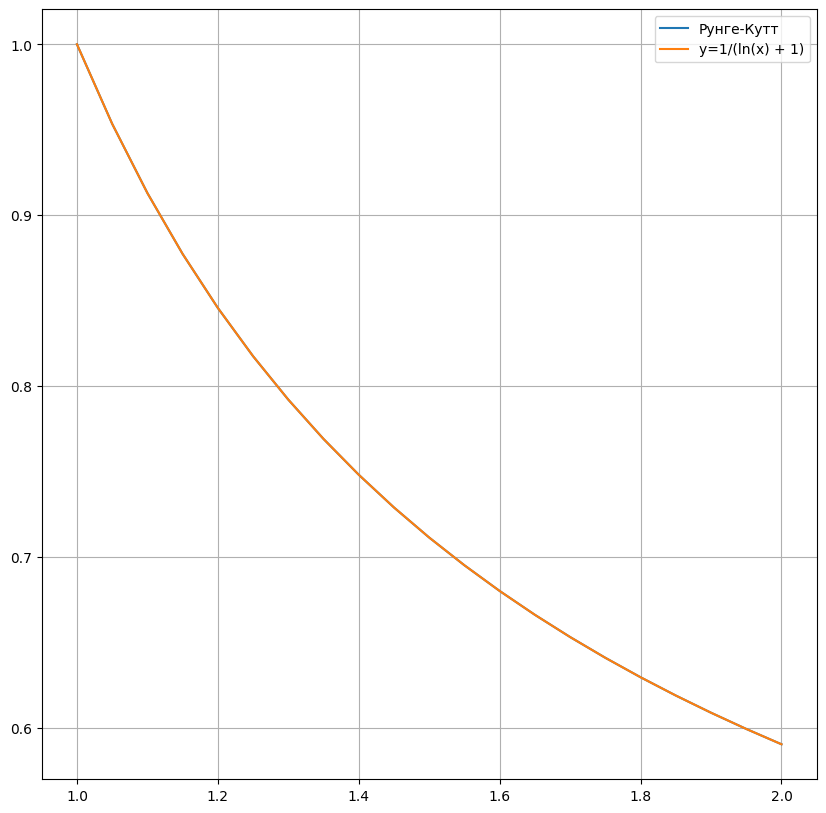

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(runge_x, runge_y, label=f'Рунге-Кутт')
ax.plot(x_true_range, y_true_range, label=f'y=1/(ln(x) + 1)')

ax.grid()
ax.legend()

In [11]:
error = abs(runge_y[-1] - y_true_range[-1])
error

np.float64(3.828544625772423e-08)

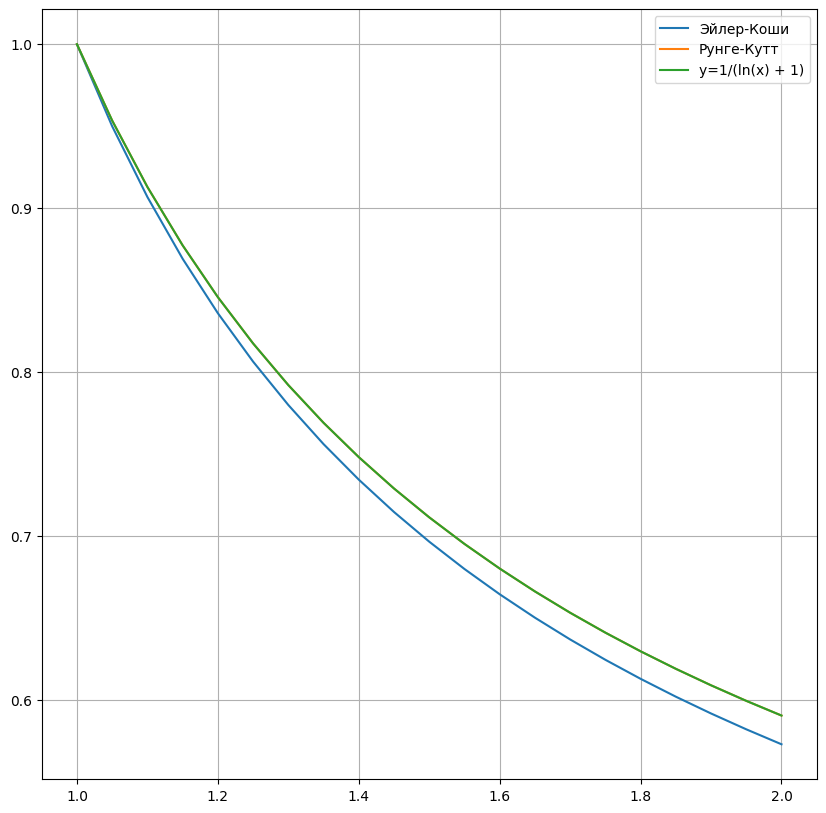

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(euler_x, euler_y, label='Эйлер-Коши')
ax.plot(runge_x, runge_y, label='Рунге-Кутт')
ax.plot(x_true_range, y_true_range, label=f'y=1/(ln(x) + 1)')


ax.grid()
ax.legend()